# Predicting Sales Prices

 ## Dataset Attributes

 The dataset contains information about houses in Ames, Iowa. The data was collected by the Ames City Assessor’s Office describing 2930 property sales which occurred in Ames, Iowa between 2006 and 2010. The dataset, containing 81 variables, was compiled and published by De Cock in 2011.

 Some of the variables contained in the original dataset have been removed from the the dataset provided to you.
 The dataset provided to you contains the following variables:
* **Year_Built:** year that the house was originally constructed
* **Year_Remod_Add:** year that the house was last remodelled
* **Total_Bsmt_SF:** total size of basement area in square feet
* **First_Flr_SF:** size of the first floor in square feet
* **Second_Flr_SF:** size of the second floor in square feet
* **Gr_Liv_Area:** size of above grade, ground living area in square feet
* **Full_Bath:** number of full above grade bathrooms in the house
* **Half_Bath:** number of half above grade bathrooms in the house
* **Bedroom_AbvGr:** number of above grade bedrooms (does not include basement bedrooms)
* **Kitchen_AbvGr:** number of above grade kitchens
* **TotRms_AbvGrd:** total number of above grade rooms (does not include bathrooms)
* **Fireplaces:** number of fireplaces in the house
* **Garage_Area:** size of garage in square feet
* **Sale_Price:** sale price of the house in dollars


*De Cock, D. (2011). "Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester
Regression Project," Journal of Statistics Education, Volume 19, Number 3.*

- https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt
- http://ww2.amstat.org/publications/jse/v19n3/decock.pdf


 ## Objective

 The goal of this task is to analyse the relationship between these variables and build a multiple linear regression model to predict the sales prices based on the 'Gr_Liv_Area' and 'Garage_Area` variables.


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [3]:
# Read in the data set
ames_df = pd.read_csv('ames.csv')
ames_df.head()

,Year_Built,Year_Remod_Add,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Area,Sale_Price
0,1960,1960,1080,1656,0,1656,1,0,3,1,7,2,528,215000
1,1961,1961,882,896,0,896,1,0,2,1,5,0,730,105000
2,1958,1958,1329,1329,0,1329,1,1,3,1,6,0,312,172000
3,1968,1968,2110,2110,0,2110,2,1,3,1,8,2,522,244000
4,1997,1998,928,928,701,1629,2,1,3,1,6,1,482,189900


In [4]:
ames_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Year_Built      2930 non-null   int64
 1   Year_Remod_Add  2930 non-null   int64
 2   Total_Bsmt_SF   2930 non-null   int64
 3   First_Flr_SF    2930 non-null   int64
 4   Second_Flr_SF   2930 non-null   int64
 5   Gr_Liv_Area     2930 non-null   int64
 6   Full_Bath       2930 non-null   int64
 7   Half_Bath       2930 non-null   int64
 8   Bedroom_AbvGr   2930 non-null   int64
 9   Kitchen_AbvGr   2930 non-null   int64
 10  TotRms_AbvGrd   2930 non-null   int64
 11  Fireplaces      2930 non-null   int64
 12  Garage_Area     2930 non-null   int64
 13  Sale_Price      2930 non-null   int64
dtypes: int64(14)
memory usage: 320.6 KB


**Data set exploration:**
- No missing values found. 
- Zero values for garage area were kept since those values are valid and represent houses with no garage. 
- All columns are numeric and ready for modelling. 

In [5]:
# Clean and pre-process the data if neccessary

# Check for NaN values in the dataset
nan_check = ames_df.isnull().sum()

# Check for zero values in specific important columns
zero_check = (ames_df[['Gr_Liv_Area', 'Garage_Area']] == 0).sum()

# Display the checks
print('nan check:\n', nan_check)
print('\nzero check:\n', zero_check)

nan check:
 Year_Built        0
Year_Remod_Add    0
Total_Bsmt_SF     0
First_Flr_SF      0
Second_Flr_SF     0
Gr_Liv_Area       0
Full_Bath         0
Half_Bath         0
Bedroom_AbvGr     0
Kitchen_AbvGr     0
TotRms_AbvGrd     0
Fireplaces        0
Garage_Area       0
Sale_Price        0
dtype: int64

zero check:
 Gr_Liv_Area      0
Garage_Area    158
dtype: int64


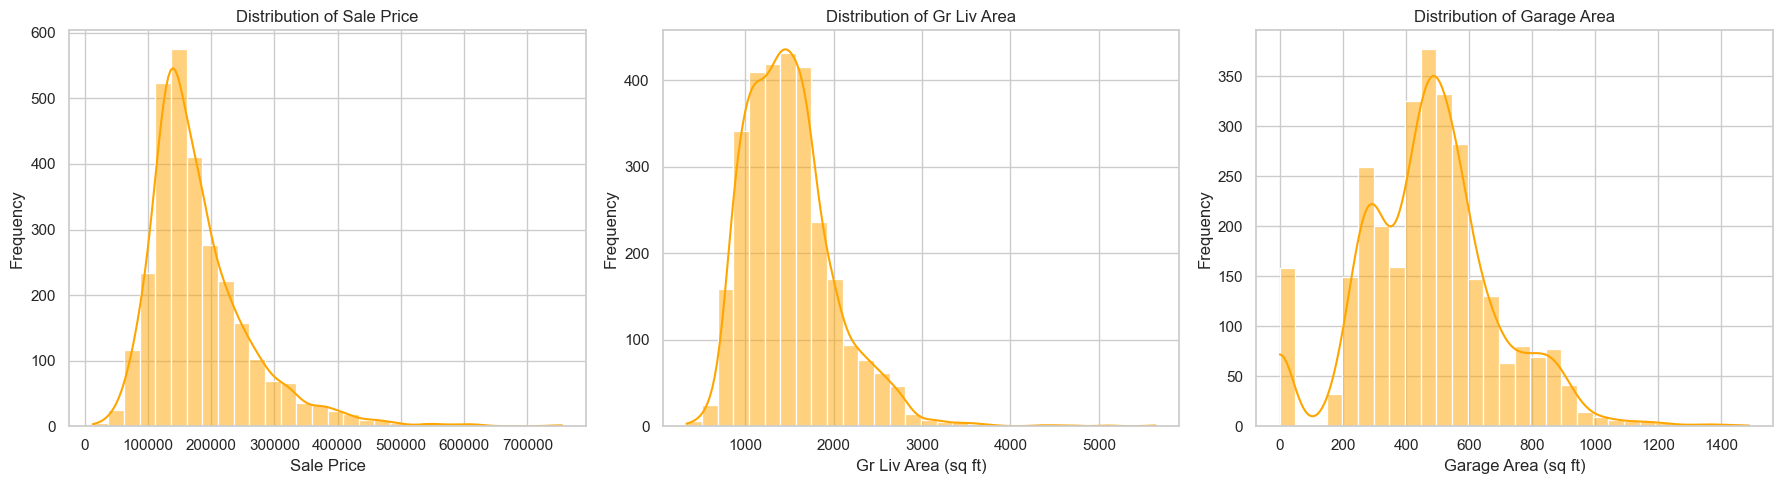

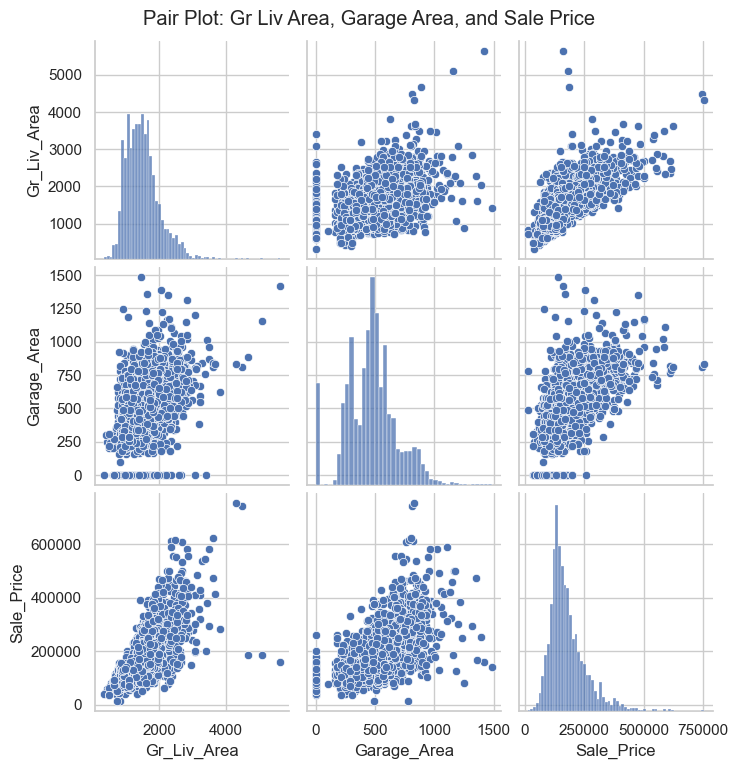

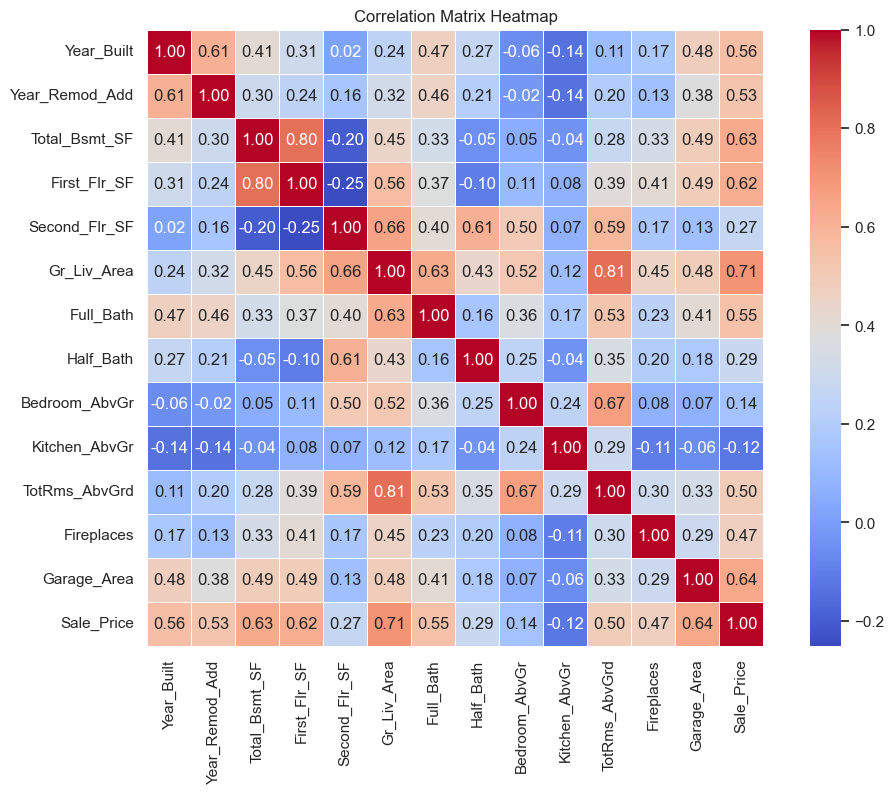

In [6]:
# Explore the data with visualisations such as histograms and correlation matrices

# Set Seaborn style
sns.set_theme(style='whitegrid')

# Create a figure with 3 subplots for histograms
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plot Sale Price Distribution
sns.histplot(ames_df['Sale_Price'], bins=30, kde=True, ax=axs[0], color='orange')
axs[0].set_title('Distribution of Sale Price')
axs[0].set_xlabel('Sale Price')
axs[0].set_ylabel('Frequency')

# Plot Gr_Liv_Area Distribution
sns.histplot(ames_df['Gr_Liv_Area'], bins=30, kde=True, ax=axs[1], color='orange')
axs[1].set_title('Distribution of Gr Liv Area')
axs[1].set_xlabel('Gr Liv Area (sq ft)')
axs[1].set_ylabel('Frequency')

# Plot Garage_Area Distribution
sns.histplot(ames_df['Garage_Area'], bins=30, kde=True, ax=axs[2], color='orange')
axs[2].set_title('Distribution of Garage Area')
axs[2].set_xlabel('Garage Area (sq ft)')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Pair plot for a subset of variables with title
pair_plot = sns.pairplot(ames_df[['Gr_Liv_Area', 'Garage_Area', 'Sale_Price']])
pair_plot.fig.suptitle("Pair Plot: Gr Liv Area, Garage Area, and Sale Price", y=1.02)
plt.show()

# Compute correlation matrix for the dataset
corr_matrix = ames_df.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

**Insights from the plots:**
1. `Sale_price` is right-skewed, typical for house prices due to a few high-end, more luxurious properties.
2. `Gr_Liv_Area` shows a normal distribution, but with potential outliers at the higher end. 
3. `Garage_Area` has a left-skew with many smaller garages and a few larger ones.

- Summary : 

`Both Gr_Liv_Area` and `Garage_Area` demonstrate significant positive correlations with `Sale_Price`, suggesting they are strong predictors. Additional variables, like `Total_Bsmt_SF` and `Fireplaces`, also show moderate correlations and could be considered in more complex models.

In [7]:
# Split the independent variables from the dependent variable

# Define independent variables (features)
X = ames_df[['Gr_Liv_Area', 'Garage_Area']]

# Define dependent variable (target)
y = ames_df['Sale_Price']

# Check on their shapes
print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (2930, 2)
Target shape: (2930,)


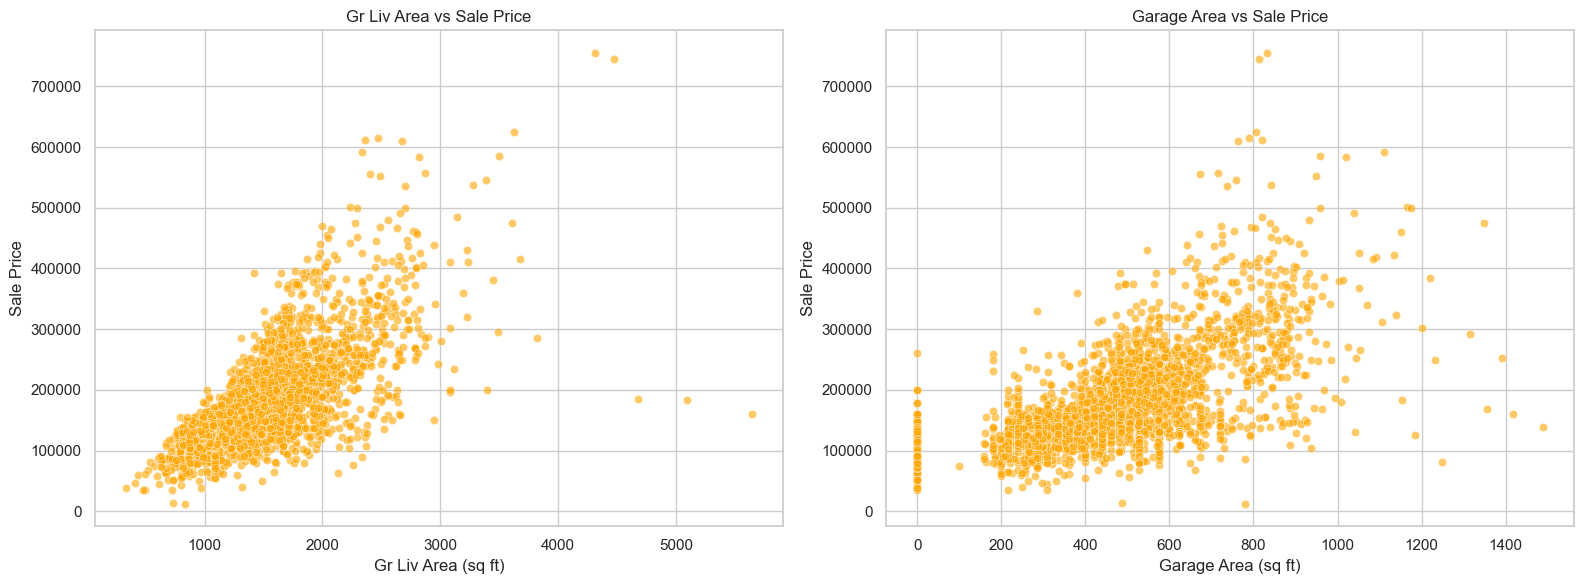

Correlation with Sale Price:
 Sale_Price     1.000000
Gr_Liv_Area    0.706780
Garage_Area    0.640138
Name: Sale_Price, dtype: float64


In [8]:
# Explore relationships between the independent and dependent variables

# Set Seaborn style
sns.set_theme(style='whitegrid')

# Create two scatter plots side by side
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot: Gr_Liv_Area vs Sale_Price
sns.scatterplot(x=ames_df['Gr_Liv_Area'], y=ames_df['Sale_Price'], ax=axs[0], color='orange', alpha=0.6)
axs[0].set_title('Gr Liv Area vs Sale Price')
axs[0].set_xlabel('Gr Liv Area (sq ft)')
axs[0].set_ylabel('Sale Price')

# Scatter plot: Garage_Area vs Sale_Price
sns.scatterplot(x=ames_df['Garage_Area'], y=ames_df['Sale_Price'], ax=axs[1], color='orange', alpha=0.6)
axs[1].set_title('Garage Area vs Sale Price')
axs[1].set_xlabel('Garage Area (sq ft)')
axs[1].set_ylabel('Sale Price')

# Adjust layout
plt.tight_layout()
plt.show()

# Correlation with Sale_Price for further insight
corr_with_sale_price = ames_df[['Gr_Liv_Area', 'Garage_Area', 'Sale_Price']].corr()['Sale_Price'].sort_values(ascending=False)
print("Correlation with Sale Price:\n", corr_with_sale_price)



**Insights from relationships:**
1. `Gr_Liw_Area` vs `Sale_Price`: Strong positive linear relationship. As living ares increases, sale price tends to increase. 
2. `Garage_Area` vs `Sale_Price`: Shows a positive trend but with a bit more variability, especially when it comes to large garages.

In [9]:
# Create a training and test set with a 75:25 split ratio

# Define features and target
X = ames_df[['Gr_Liv_Area', 'Garage_Area']]
y = ames_df['Sale_Price']

# Split into training and testing sets
r_seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=r_seed)

# Display the shape of the splits
X_train.shape, X_test.shape

((2197, 2), (733, 2))

In [10]:
# Build a multiple linear regression model using 'Gr_Liv_Area' and 'Garage_Area'

# Create and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Model trained. Let's get the intercept and coefficients next.
intercept = lr_model.intercept_
coefficients = lr_model.coef_

In [11]:
# Print the model intercept and coefficients
print('Model coefficients: \n', lr_model.coef_)
print('Model intercept:\n', lr_model.intercept_)

Model coefficients: 
 [ 78.69286848 141.14571761]
Model intercept:
 -5059.448195610428


**Intercept and Coefficients interpretation:**
- For every additional square foot of living area, the sale price increases by about $78.69, holding garage size constant. 
- For every additional square foot of garage area, the sale price increases by about $141.15, holding live area constant. 
- The intercept is not meaningful here - it simply adjusts the baseline of the regression model.

In [12]:
# Generate predictions for the test set
y_pred = lr_model.predict(X_test)

In [19]:
# Evaluate the model
r2 = r2_score(y_test, y_pred)
print(f"R2 score:{r2:.4f}")

R2 score:0.6386


**Performance metric interpretaion:**

The model explains approximately 63.9% of the variance in house sale prices.
This indicates a moderately strong relationship between the selected features `Gr_Liv_Area` and `Garage_Area` and the target variable `Sale_Price`.
However, about 36.1% of the variance remains unexplained, suggesting that additional features or more complex models might improve predictive power.

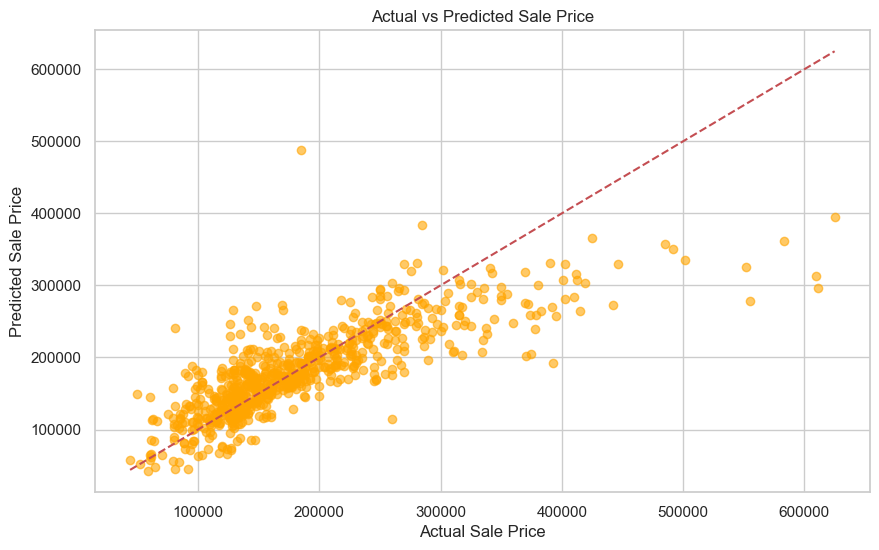

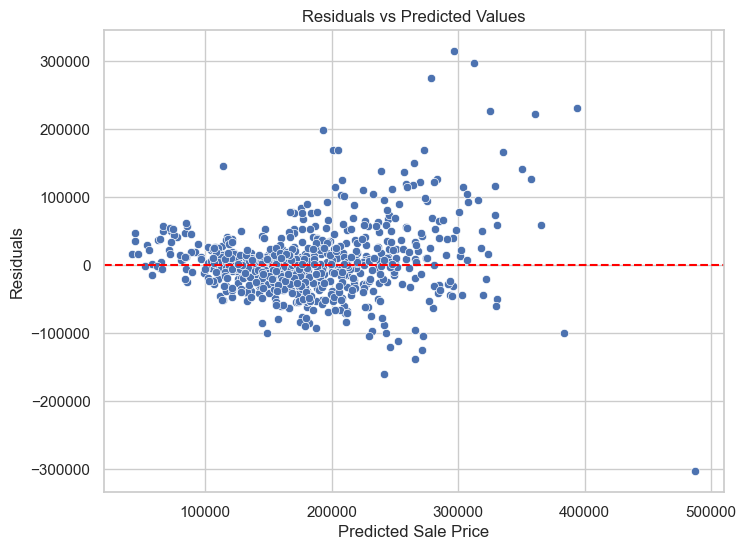

In [14]:
# Generate a plot

# Actual vs Predicted Scatter Plot
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted sale prices
plt.scatter(y_test, y_pred, alpha=0.6, color='orange')

# Plot a red dashed line: perfect predictions (where predicted = actual)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

# Labels and title
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price')

# Show the plot
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

**Model and Error plot insights:**
- The red dashed line represent perfect predicitions
- Many points lie close to the line, indicating decent predicitions. 
- There is some spread, especially at higher sale prices, which suggests the model has increased error for more expensive houses.

In [15]:
# Print the coefficients

# Print the intercept of the model
print("Intercept:", lr_model.intercept_)

# Print the coefficients
coefficients = lr_model.coef_

# Combine feature names and coefficients for clarity
feature_coefficients = pd.DataFrame({
    'Feature': ['Gr_Liv_Area', 'Garage_Area'],
    'Coefficient': coefficients
})

# Display the coefficients
print(feature_coefficients)

# Display the model equation
coef_summary = dict(zip(X.columns, coefficients))
print(f"\nModel Equation: Sale_Price = {intercept:.2f} + {coef_summary['Gr_Liv_Area']:.2f}*Gr_Liv_Area + {coef_summary['Garage_Area']:.2f}*Garage_Area")

Intercept: -5059.448195610428
       Feature  Coefficient
0  Gr_Liv_Area    78.692868
1  Garage_Area   141.145718

Model Equation: Sale_Price = -5059.45 + 78.69*Gr_Liv_Area + 141.15*Garage_Area


**Interpret coefficients in the context of the prediction:**

1. `Gr_Liv_Area` Coefficient = 78.69
For every additional square foot of above-ground living area, the model predicts the `Sale Price` will increase by $78.69, assuming the `Garage_Area` stays the same.

2. `Garage_Area` Coefficient = 141.15
For every additional square foot of garage space, the model predicts the `Sale Price` will increase by $141.15, assuming `Gr_Liv_Area` stays constant.

3. Intercept = -5059.45
The intercept is the theoretical sale price when both Gr_Liv_Area and Garage_Area are zero. In practice, this doesn't make sense for a house, but it's part of how the regression line is mathematically calculated.

- Putting it all together, for a house with:

    1,500 sq ft of living space and 500 sq ft of garage space  - The predicted sale price would be:

    Sale_Price = (-5059.45) + (78.69 * 1500) + (141.15 * 500)

    Sale_Price ≈ 183,550.55

**Summarise findings**

**1. Exploratory Data Analysis (EDA)**

The Sale Price distribution is right-skewed, with most homes priced between $100,000 and $300,000.

`Gr_Liv_Area` (above-ground living area) and `Garage_Area` (garage space) were selected as independent variables based on their logical influence on house prices and positive correlations with the `Sale_Price`.

Visualizations and scatter plots confirmed strong positive relationships:

`Gr_Liv_Area` shows a strong linear relationship with `Sale_Price`.

`Garage_Area` has a positive relationship, but with more variability.

**2. Data Preprocessing**

No missing values were found in the dataset.

All variables are numeric and suitable for modeling.

About 158 properties have Garage_Area = 0, likely indicating houses with no garage, which is valid and was retained in the analysis.

**3. Model Building and Evaluation**

A Multiple Linear Regression Model was built using:

`Gr_Liv_Area` and `Garage_Area`

Data was split into 75% training and 25% testing subsets.

Model Performance on the Test Set:

The model explains approximately 63.9% of the variance in house sale prices.
This indicates a moderately strong relationship between the selected features `Gr_Liv_Area` and `Garage_Area` and the target variable `Sale_Price`.
However, about 36.1% of the variance remains unexplained, suggesting that additional features or more complex models might improve predictive power.

**4. Model Coefficients and Interpretation**

- **Intercept**: -5059.45

- **Gr_Liv_Area Coefficient**: 78.69

For every additional square foot of living space, the sale price increases by approximately $78.69, holding garage area constant.

- **Garage_Area Coefficient**: 141.15

For every additional square foot of garage area, the sale price increases by approximately $141.15, holding living space constant.

This suggests garage space adds more value per square foot than living space in this model, which may reflect buyer preferences in the Ames housing market.

**5. Visualization of Model Performance**

The Actual vs Predicted Sale Price scatter plot showed:

A strong linear trend, with most predictions falling close to the ideal line.

Increased prediction error for higher-priced homes, which may indicate non-linearity or the need for more features in the model.
